# Introduction to Visualizing Text Data: One-Upping the WordCloud

**Audience:** Teachers/Learners

**Use Case**: Tutorial/How-To

**Difficulty:** Beginner/Intermediate

**Completion Time:** ~45 minutes

**Knowledge Required:**

* Python basics (variables, flow control, creating custom functions, lists, dictionaries)
* Basic understanding of working with word frequencies (we will look at some other ways to do many of the things covered in the ITHAKA notebook on "Exploring Word Frequencies" [here](https://constellate.org/tutorials/exploring-word-frequencies))

**Knowledge Recommended:**

* [`WordCloud`](https://amueller.github.io/word_cloud/index.html) visualizations
* Basic understanding of [`matplotlib`](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) for graphing and plotting
* Very basic understanding of [`pandas`](https://pandas.pydata.org/) for tabular data manipulation
* Regular Expressions to help clean up our data (official documentation [here](https://docs.python.org/3/howto/regex.html)—more fun [video version](https://www.youtube.com/watch?v=sa-TUpSx1JA&t=141s) courtesy of Corey Schafer)—this is helpful but not required

**Learning Objectives:** After this lesson, learners will be able to:

1. Understand the importance of getting data into a format that we can use for further analysis
2. Implement some basic data wrangling to get our data into a format that will allow us to use that data to produce different kinds of visualization
3. Produce some simple plots of word counts within a text pulled down from Constellate.

**Research Pipeline:**

1. Research steps before this notebook: grab some data from [Constellate's Dataset Builder](https://constellate.org/)
2. Plot some visualizations of words frequencies in our dataset.
3. Steps after this notebook: find your very own dataset and go to town!
4. Show us the results.

## Table of Contents

1. Importing necessary libraries
2. Grabbing our dataset and initial inspection of said data with pandas
3. Data (re)wrangling with custom functions to handle what we're interested in 
4. Preliminary Word Cloud creation to see the need for further data wrangling/cleaning
5. Different Methods of Visualization instead of the Word Cloud: pie charts, barplots, treemaps
6. Exercises

### Required Data:

**Data Format**:

* File downloaded from the [Constellate site](https://constellate.org/) in `.gz` format (this file also available from [here](https://github.com/kspicer80/jstor_teaching_demo/blob/main/datasets/law_full.jsonl.gz))

Starting with the , I simply downloaded the built dataset to my local machine (other options for loading the dataset are available [here](https://constellate.org/tutorials/exploring-metadata)—the downloaded  file comes as a `.gz` file, so we need to open that up with the handy [`gzip` library](https://docs.python.org/3/library/gzip.html). We want to do a little bit of work with [`pandas`](https://pandas.pydata.org/docs/) here (we could work, of course, just with the standard `json` library, but we're going to want to do some manipulation on the data and pandas is perfecty suited for that). So let's get the file opened up and into a DataFrame:

### Introductory Remarks:

Here in this notebook we are going to be grabbing some data from Constellate, doing a little bit of [exploratory data analysis (EDA)](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15#:~:text=Exploratory%20Data%20Analysis%20refers%20to,summary%20statistics%20and%20graphical%20representations.), and then utilizing some of the data to plot word frequencies in the downloaded data. We will also look at some of the ways we might one-up the standard WordCloud seen so often in introductory treatments of textual data visualization.

### Lesson:

Here in this notebook we're going to do a little bit of work with the JSTOR Constellate [data builder](https://constellate.org/builder). I started by searching "free speech" and "First Amendment" as keywords, grabbing all the "full text" document types within the "Law" category. Constellate also has a nice feature that gives assigns a "Dataset ID" to each of the datasets one builds. The one for this project is "b7adbb84-6bec-549e-83bb-11aeb045e5f9". 

### 1. Getting our Libraries Imported

In [34]:
import re
import gzip
import matplotlib.pyplot as plt
import pandas as pd
# Nice primer on pandas display_options [here](https://towardsdatascience.com/8-commonly-used-pandas-display-options-you-should-know-a832365efa95)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import circlify

In [35]:
df = pd.read_json(gzip.open('./datasets/law_full.jsonl.gz'), lines=True)

### 2. Dataset Inspection:

In [36]:
df.head()

,creator,datePublished,docSubType,docType,fullText,id,identifier,isPartOf,issueNumber,language,outputFormat,pageCount,pageEnd,pageStart,pagination,provider,publicationYear,publisher,sourceCategory,tdmCategory,title,url,volumeNumber,wordCount,unigramCount,bigramCount,trigramCount,abstract,collection,editor,hasPartTitle,keyphrase,subTitle
0,[Thomas Reed Powell],1922-01-01,research-article,article,"[MICHIGAN LAW REVIEW VOL. XX JANUARY, 1922 No. 3 THE SUPREME COURT'S CONSTRUCTION OF THE FEDERAL CONSTITUTION IN I920-I92I, III1 IV. PoLIcE POWER THE difficulty of classifying cases on the police power has not evaporated since the review of decisions for the preceding year. The headings there suggested are used here. Classification on the basis of the objects of the legislation appears too precarious to be attempted with any confidence. It seems safer to work along the line of the subject ma...",http://www.jstor.org/stable/1277162,"[{'name': 'issn', 'value': '00262234'}, {'name': 'local_uuid', 'value': 'bc2669a7-d087-3bf4-8b2b-aebe1b9003bf'}, {'name': 'local_doi', 'value': '10.2307/1277162'}, {'name': 'journal_id', 'value': 'michlawrevi'}]",Michigan Law Review,3.0,[eng],"[unigram, bigram, trigram, fullText]",28,288,261,pp. 261-288,jstor,1922,The Michigan Law Review Association,"[Law, Law]",[Law - Civil law],"The Supreme Court's Construction of the Federal Constitution in 1920-1921, III",http://www.jstor.org/stable/1277162,20.0,11348,"{'denied.': 1, 'opposing': 3, 'take': 5, 'retrial': 1, 'interruptions,': 1, 'Utility': 2, 'state;': 1, 'fought': 1, 'Coal': 2, 'prospective': 1, '""Validity': 1, 'franchises,': 1, 'various': 3, 'injured': 1, 'be,': 2, 'affirmed': 2, 'Co.34': 1, 'inferred': 1, 'weight': 1, 'reliance': 1, 'remarked': 1, 'Sentimental': 1, 'side': 2, 'dissent.27': 1, 'TAXATION,': 1, 'world.""': 1, 'jurisdiction': 2, '862;': 1, 'Commissioners,40': 1, 'impose': 1, 'classification': 3, 'immutable': 1, 'conserved': 1,...","{'basis of': 1, 'in 69': 2, 'once the': 1, 'in defiance': 1, 'lease which': 1, '""public utilities""': 1, 'companies indicate': 1, 'MARQUErTE L.': 1, 'employment made': 1, 'are, and': 1, 'not come': 1, '282 (I92I).': 1, 'in Deeds,""': 1, 'the parties': 1, 'of treason': 1, 'occasions feeling': 1, 'on whether': 2, 'so classifying': 1, 'Ct. 252': 1, '28255 U.': 1, 'y14 was': 1, 'Scanlon Co.': 1, 'Brewster Rhoads,': 1, 'state, and': 2, 'denying the': 1, 'BULL. io6': 1, 'Mr. Justices': 1, 'or loss':...","{'manufacturing or domestic': 1, 'Prices of Commodities,""': 1, 'to infer anything': 1, 'of four objecting': 1, 'notes in 34': 1, 'v. Coronado Beach': 1, 'yields substantial compensation': 1, 'grade crossings in': 1, 'in other ways': 1, 'for compensation in': 1, 'Regulation and Housing': 1, 'penalties for delay': 1, 'will be treated': 1, 'demands. We do': 1, 'justifying the regulation': 1, 'unconstitutionality. The problem': 1, 'to certain cities': 1, 'any confidence. It': 1, 'Without previou...",NaN,NaN,NaN,NaN,NaN,NaN
1,"[Elizabeth Goitein, Faiza Patel]",2020-10-22,NaN,report,"[TRANSITION 2020–2021 A Presidential Agenda for Liberty and National Security By Elizabeth Goitein and Faiza Patel PUBLISHED OCTOBER 22, 2020 Brennan Center for Justice at New York University School of Law policy proposal, Table of Contents Foreword . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 3 A B O U T T H E B R E N N A N C E N T E R FO R J U ST I C E Introduction . . . . . . . . . . . . . . . . . . . . . . . ....",http://www.jstor.org/stable/resrep28426,"[{'name': 'local_uuid', 'value': '3dbcbae0-0d2f-3b58-9d5a-c55e6d5b6127'}]",NaN,NaN,[eng],"[unigram, bigram, trigram, fullText]",23,NaN,NaN,NaN,jstor,2020,Brennan Center for Justice,NaN,[Law - Computer law],A Presidential Agenda for Liberty and National Security,http://www.jstor.org/stable/resrep28426,NaN,13697,"{'MacArthur': 1, 'secrecy,': 1, 'com/infectiousdisease/covid19/87632': 1, 'advocacy.': 1, 'white-hous

So we have a dataframe with 33 different columns, we can get a full list of column names:

In [37]:
df.columns

Index(['creator', 'datePublished', 'docSubType', 'docType', 'fullText', 'id',
       'identifier', 'isPartOf', 'issueNumber', 'language', 'outputFormat',
       'pageCount', 'pageEnd', 'pageStart', 'pagination', 'provider',
       'publicationYear', 'publisher', 'sourceCategory', 'tdmCategory',
       'title', 'url', 'volumeNumber', 'wordCount', 'unigramCount',
       'bigramCount', 'trigramCount', 'abstract', 'collection', 'editor',
       'hasPartTitle', 'keyphrase', 'subTitle'],
      dtype='object')

When we built the dataset from Constellate we did ask only for "Full Text" articles, so it helps to just check that we got what we wanted. We can count the number of NaN values under that column as follows:

In [38]:
df['fullText'].isna().sum()

0

Checks out! We can also see how many NaN vlaues there are in the entire dataframe with the following simple little for loop (while also utilizing the really hand [f-string formatting](https://realpython.com/python-f-strings/):

In [39]:
for column in df:
    print(f"The number of NaN values in {column} is: {df[column].isna().sum()}")

The number of NaN values in creator is: 28
The number of NaN values in datePublished is: 0
The number of NaN values in docSubType is: 67
The number of NaN values in docType is: 0
The number of NaN values in fullText is: 0
The number of NaN values in id is: 0
The number of NaN values in identifier is: 0
The number of NaN values in isPartOf is: 42
The number of NaN values in issueNumber is: 67
The number of NaN values in language is: 0
The number of NaN values in outputFormat is: 0
The number of NaN values in pageCount is: 0
The number of NaN values in pageEnd is: 42
The number of NaN values in pageStart is: 42
The number of NaN values in pagination is: 42
The number of NaN values in provider is: 0
The number of NaN values in publicationYear is: 0
The number of NaN values in publisher is: 26
The number of NaN values in sourceCategory is: 42
The number of NaN values in tdmCategory is: 0
The number of NaN values in title is: 0
The number of NaN values in url is: 0
The number of NaN values 

`Pandas`, of course, also has a way to get this information using the .info() method.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creator          82 non-null     object 
 1   datePublished    110 non-null    object 
 2   docSubType       43 non-null     object 
 3   docType          110 non-null    object 
 4   fullText         110 non-null    object 
 5   id               110 non-null    object 
 6   identifier       110 non-null    object 
 7   isPartOf         68 non-null     object 
 8   issueNumber      43 non-null     float64
 9   language         110 non-null    object 
 10  outputFormat     110 non-null    object 
 11  pageCount        110 non-null    int64  
 12  pageEnd          68 non-null     object 
 13  pageStart        68 non-null     object 
 14  pagination       68 non-null     object 
 15  provider         110 non-null    object 
 16  publicationYear  110 non-null    int64  
 17  publisher       

We have a total of 110 rows and the 'fullText' column registers "110 non-null values," so we've got full text for all the entries here. 

In [41]:
nans = df[df['fullText'].isna()]
print(nans)

Empty DataFrame
Columns: [creator, datePublished, docSubType, docType, fullText, id, identifier, isPartOf, issueNumber, language, outputFormat, pageCount, pageEnd, pageStart, pagination, provider, publicationYear, publisher, sourceCategory, tdmCategory, title, url, volumeNumber, wordCount, unigramCount, bigramCount, trigramCount, abstract, collection, editor, hasPartTitle, keyphrase, subTitle]
Index: []


If we wanted to have a closer look at where in the dataframe (by index) the rows that aren't NaNs—i.e. the rows that do actually have an editor listed—rows occur, we simply call:

In [42]:
publisher_nans = df[~df['editor'].isna()]
publisher_nans['editor']

3                                                                                            [Kevin Welner]
14                                                                                         [Michael German]
52    [MICAH C. MCMILLAN, ERIC H. FRENCK, RICHARD A. HANRAHAN, JEFFREY C. CAMPBELL, THOMASA T. HUFFSTUTLER]
Name: editor, dtype: object

So now we can see that rows `3`, `14`, and `52` are the entries with a named editor or editors.

### 3. Further Investigation of the `unigramCount` Column and Further Data Restructuring of Dictionaries: 

Since we're interested in eventually visualizing the word counts in the texts of our dataset, we should first do a little exploring of the key column in question. If we print out the .head() of that column we'll see that we're dealing with a dicitionary in each row that has the word and then the number of times that word shows up in the text:

In [43]:
df['unigramCount'].head()

0    {'denied.': 1, 'opposing': 3, 'take': 5, 'retrial': 1, 'interruptions,': 1, 'Utility': 2, 'state;': 1, 'fought': 1, 'Coal': 2, 'prospective': 1, '"Validity': 1, 'franchises,': 1, 'various': 3, 'injured': 1, 'be,': 2, 'affirmed': 2, 'Co.34': 1, 'inferred': 1, 'weight': 1, 'reliance': 1, 'remarked': 1, 'Sentimental': 1, 'side': 2, 'dissent.27': 1, 'TAXATION,': 1, 'world."': 1, 'jurisdiction': 2, '862;': 1, 'Commissioners,40': 1, 'impose': 1, 'classification': 3, 'immutable': 1, 'conserved': 1,...
1    {'MacArthur': 1, 'secrecy,': 1, 'com/infectiousdisease/covid19/87632': 1, 'advocacy.': 1, 'white-house-location-data-coronavirus/;': 1, 'information': 16, 'communities': 6, 'information,': 5, 'attack': 2, 'problems': 1, 'agencies.': 1, 'existence': 1, 'Institution,': 2, 'scored': 1, 'past': 3, 'range': 1, 'Frieden,': 1, 'role.': 2, 'right': 2, 'crimination”': 1, 'https://www.wsj.com/articles/federal-agencies-use-cellphone-loca-': 1, 'Censored': 1, 'explanations': 1, 'www.justice.gov/op

We can also see just from this very short printout that the dictionaries are not sorted in any way; it might be nice to have the words with the highest counts at the start of the dictionary. How could we handle that? Well, let's write a function to sort the dictionary.

In [44]:
# Here we create our function to sort a dictionary by values from greatest to least:
def sort_a_dictionary_by_values(dictionary):
    sorted_dict = dict(sorted(dictionary.items(), key=lambda x: x[1], reverse=True))
    # Documentation for the `lambda` function available [here](https://www.w3schools.com/python/python_lambda.asp)
    return(sorted_dict)

Now let's test it by creating a simple "toy dictionary" and see if everything works as we want.)

In [45]:
test_dictionary = {'howdy': 5643, 'doody': 89080, 'time': 10}
test_dictionary_sorted = sort_a_dictionary_by_values(test_dictionary)
print(f"Your unsorted dictionary looks like: {test_dictionary}")
print(f"Your sorted dictionary now looks like: {test_dictionary_sorted}")

Your unsorted dictionary looks like: {'howdy': 5643, 'doody': 89080, 'time': 10}
Your sorted dictionary now looks like: {'doody': 89080, 'howdy': 5643, 'time': 10}


Cool!

With our `sort_a_dictionary_by_values()` function defined, we can quite easily see which words are the most frequent in each row of the `unigramCount` column. We can even create another column in our dataframe to hold that sorted dictionary:

In [46]:
df['unigramCountSorted'] = df['unigramCount'].apply(sort_a_dictionary_by_values)
df['unigramCountSorted'].head()

0    {'the': 849, 'of': 499, 'to': 337, 'and': 251, 'in': 243, 'a': 189, 'that': 180, 'is': 139, 'L.': 121, 'be': 109, 'was': 108, 'it': 96, 'not': 93, 'by': 87, 'on': 87, 'for': 84, 'The': 79, 'or': 75, 'as': 68, 'state': 67, 'which': 51, 'an': 51, 'REV.': 49, 'may': 47, 'with': 42, 'Justice': 40, 'are': 40, '*': 39, 'its': 37, 'U.': 37, 'REv.': 35, 'statute': 35, 'were': 35, 'Mr.': 35, 'power': 34, 'v.': 34, 'S.': 33, 'Ct.': 31, 'MICH.': 31, 'Sup.': 31, 'had': 31, 'court': 30, 'their': 30, 'pub...
1    {'.': 768, 'and': 490, 'the': 468, 'of': 376, 'to': 299, 'for': 191, 'a': 151, 'in': 147, 'on': 132, 'that': 93, 'The': 83, 'National': 68, 'should': 66, 'as': 63, 'is': 61, 'Brennan': 61, 'Center': 59, 'with': 51, '2020,': 49, 'by': 49, 'A': 47, 'Justice': 45, 'or': 42, 'has': 41, 'president': 41, 'Security': 41, 'are': 38, 'Act': 37, 'an': 37, 'U': 36, '.S': 36, 'from': 35, 'be': 33, '2019,': 33, 'Congress': 32, 'which': 31, 'national': 31, 'have': 30, 'New': 30, 'not': 29, 'law': 29

### 4. Creating Some Word Clouds—& Seeing the Need for Some Further Data Cleaning:

The previous cell block certainly shows us one way of visualizing these counts. Another is the good ol' WordCloud, which sizes the font of a word based on its frequency, i.e. so words that show up more often are printed in larger font sizes. (The font colors also change based upon the frequency.) There are a number of ways we could go about getting the data that we have from Constellate into a nice format to plot in a Word Cloud, but we want to see if we can be a little bit more flexible here. Since the dataset already comes with word counts (counts that we can now sort), it's a pretty easy step to get a WordCloud visualization—a visualization we can use to see if it matches up with what we got in the previous cell. In fact, the [WordCloud library](https://amueller.github.io/word_cloud/) (a go-to library for many text analysis practitioners for generating WordClouds here in the Python ecosystem) already has [a function](https://amueller.github.io/word_cloud/auto_examples/frequency.html?highlight=generate%20from%20frequencies) to create the cloud right from the word frequencies. We can therefore use the word frequencies already stored in the `unigramCountSorted` column of our dataframe. So let's write a simple function that utilizes it and creates the word cloud:

In [47]:
def generate_word_cloud(dict_values):

    wordcloud = WordCloud(width=700, height=700, max_words=100, random_state=1, background_color='gray', colormap='plasma', collocations=False).generate_from_frequencies(dict_values)
    #plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Let's say we wanted to produce a word cloud solely for the text in the first row of our dataframe. Simple enough!

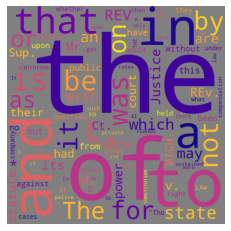

In [48]:
generate_word_cloud(df['unigramCountSorted'].iloc[0])

This would seem to match up and jive well with our printout a couple of cells earlier; we saw there that the words "the," "of," "to," and "and" were at the top of the list—and the visualization here shows that both in terms of those words' font sizes and colors as well.

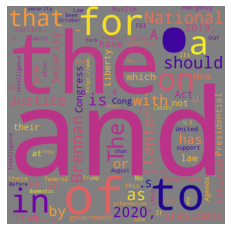

In [49]:
generate_word_cloud(df['unigramCountSorted'].iloc[1])

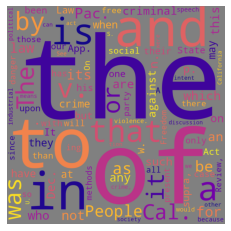

In [50]:
generate_word_cloud(df['unigramCountSorted'].iloc[2])

Of course, it turns out that these words are common in all of the printouts from the `df['unigramCountSorted'].head()` call.

So far we can see a strong motivation for something that most digital text analysts know about all too well. These short words—"the," "and," "to," etc.—are all ones that show up incredibly often in English, but they do not contribute all that much to the meaning of the text. Therefore, in the whole "data cleaning" process, we often spend some time removing words like them from our data. If one hunts around a tiny little bit in the [documentation for the WordCloud class](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html?highlight=generate%20from%20frequencies), they will notice that said documentation explicitly states that if one uses the `generate_from_frequencies` function, the standard stopwords are "[i]gnored if using `generate_from_frequencies`.") Now, what if we wanted to still use our dictionary of word frequencies and remove all of those stopwords from our dictionary? Well,  let's practice a little bit and write our own function to do it using the list of stopwords in WordCloud. We'll initialize a list that contains the standard English stopwords and then remove them from the dictionary with our function. 

First we set the `STOPWORDS` list from the WordCloud library and then create our test list. And, let's show a couple of different ways to do this—one using a good ol' [Python list comprehension](https://realpython.com/list-comprehension-python/) and the other with a custom function we create:

In [51]:
stop_words = set(STOPWORDS)
# We can see all the stopwords WordCloud provides if we simply `print(stop_words)`

def remove_stopwords_from_a_dict(dictionary):
    cleaned_dictionary = {k: v for k, v in dictionary.items() if k not in stop_words}
    return(cleaned_dictionary)

test_dictionary = {'a': 9808, 'an': 83987, 'He Who Must Not Be Named': 3245, 'Harry Potter': 4542324, 'Hermione Granger': 10000000, 'Ronald': 980, 'the': 2, 'of': 56, 'in': 12, 'Sirius Black': 87}

cleaned_test_dictionary = remove_stopwords_from_a_dict(test_dictionary)
cleaned_test_dictionary

{'He Who Must Not Be Named': 3245,
 'Harry Potter': 4542324,
 'Hermione Granger': 10000000,
 'Ronald': 980,
 'Sirius Black': 87}

Looks good—no stopwords showing up ... now let's utilize the function to remove the stopwords and then plot the word clouds again.

In [52]:
df['unigramCountSorted'] = df['unigramCountSorted'].apply(remove_stopwords_from_a_dict)

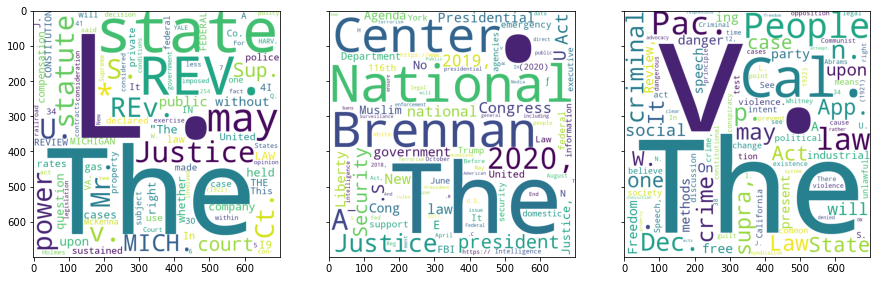

In [53]:
def return_word_cloud_object(dict_values):
    wordcloud = WordCloud(width=700, height=700, max_words=100, random_state=1, background_color='white', colormap='viridis', collocations=False).generate_from_frequencies(dict_values)
    return(wordcloud)

word_cloud_1 = return_word_cloud_object(df['unigramCountSorted'].iloc[0])
word_cloud_2 = return_word_cloud_object(df['unigramCountSorted'].iloc[1])
word_cloud_3 = return_word_cloud_object(df['unigramCountSorted'].iloc[2])

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, squeeze=False)
fig.set_figheight(30)
fig.set_figwidth(15)

axes[0][0].imshow(word_cloud_1)
axes[0][1].imshow(word_cloud_2)
axes[0][2].imshow(word_cloud_3)

Here we can see that we've got the stopwords issue (partially) handled, but there is clearly still more to do—punctuation marks are still present and there are some other strings that we would want to further clean up. We'll save that as an exercise for everyone to handle on their own later. Can we write some functions to handle all the punctuation marks, starts of a web address, numbers for years (and also, potentially, the numbers associated with case numbers and ids) Moreover, we should also notice that although the string "the" has been removed, we can still "The" showing up in the clouds? (We'll save that as an exercise for later too.)

### 5. Different Methods of Visualization instead of the Word Cloud

Here in this section we want to transition a little bit and see if there might be some ways in which we can improve the standard Word Cloud in order to give us a different way to visualize some things in our dataset. Instead of starting from our unigram counts, we're going to work with that `fullText` column we took a peek at earlier. The first thing we want to do is to determine a list of words and their counts starting from that column. 

So let's jump back to the dataframe from our original dataset and say that we are interested just in the very first row: let's select out just that row into a new dataframe:

In [54]:
df_of_interest = df.iloc[0]
print(df_of_interest.head())

creator                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         [Thomas Reed Powell]
datePublished                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Furthermore, since we're only interested in the `fullText` column, let's grab and work with just that:

In [55]:
full_text_of_interest = df_of_interest['fullText']

We should see that the entirety of the text in `fullText` is in a list, so let's convert it to a string to make it easier to get the words and counts:

In [56]:
# Guidelines for the String .join() method: https://www.w3schools.com/python/ref_string_join.asp
full_string = " ".join(full_text_of_interest)

# And let's just do a quick sanity check to make sure that we have a string and not a list
print(full_string[0:500])

MICHIGAN LAW REVIEW VOL. XX JANUARY, 1922 No. 3 THE SUPREME COURT'S CONSTRUCTION OF THE FEDERAL CONSTITUTION IN I920-I92I, III1 IV. PoLIcE POWER THE difficulty of classifying cases on the police power has not evaporated since the review of decisions for the preceding year. The headings there suggested are used here. Classification on the basis of the objects of the legislation appears too precarious to be attempted with any confidence. It seems safer to work along the line of the subject matters


Looks good—we can now do some basic text preprocessing and create a dataframe that will keep track of all of the words in the text string along with their counts. First we'll get our stopwords set up once more; split the string on whitespace; remove any numbers using a regular expression; lower case all of our tokens and make sure that all the characters in the string are letters (utilizing the [built-in `.isalpha()`](https://www.w3schools.com/python/ref_string_isalpha.asp)); filter out all the stopwords and count all the remaining tokens that are not present in that stopwords list; lastly we'll store the word and the count for each word in a handy little dataframe:

In [57]:
stop_words = set(STOPWORDS)
list_words = full_string.split(' ')
list_words = [re.sub(r'[0-9]', '', i) for i in list_words]
list_words_lower = [x.lower() for x in list_words]
list_words_alpha_only = [x for x in list_words_lower if x.isalpha() == True]
set_words_full = list(set(list_words_alpha_only))
set_words = [i for i in set_words_full if i not in stop_words]
count_words = [list_words_alpha_only.count(i) for i in set_words]

counts_df = pd.DataFrame(zip(set_words, count_words), columns=['word', 'count'])
counts_df.sort_values('count', ascending=False, inplace=True)
counts_df.reset_index(drop=True, inplace=True)
counts_df.head(10)

,word,count
0,state,68
1,may,47
2,justice,41
3,court,41
4,power,39
5,law,38
6,public,38
7,statute,35
8,without,27
9,federal,26


Okay, so let's do some visualization of our dataframe—how about a simple pie chart with the [plotly library](https://plotly.com/)?

In [58]:
n = 30
pal = list(sns.color_palette(palette='tab10', n_colors=n).as_hex())

import plotly.express as px # Pie Chart Tutorial available at https://plotly.com/python/pie-charts/

# Let's look at just the top 30 words and their counts
fig = px.pie(counts_df[0:30], values='count', names='word', color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label', hole=.6, hoverinfo='label+percent+name')

fig.update_layout(width=800, height=600, margin=dict(t=0, l=0, r=0, b=0))
fig.show()

How about another non-Word Cloud visualization. What about a simple [barplot](http://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot) utilizing the [seaborn library](http://seaborn.pydata.org/index.html)? This time let's plot the first one-hundred words instead of just the top 30?

[Text(0, 0, 'state'),
 Text(1, 0, 'may'),
 Text(2, 0, 'justice'),
 Text(3, 0, 'court'),
 Text(4, 0, 'power'),
 Text(5, 0, 'law'),
 Text(6, 0, 'public'),
 Text(7, 0, 'statute'),
 Text(8, 0, 'without'),
 Text(9, 0, 'federal'),
 Text(10, 0, 'upon'),
 Text(11, 0, 'whether'),
 Text(12, 0, 'constitution'),
 Text(13, 0, 'police'),
 Text(14, 0, 'question'),
 Text(15, 0, 'right'),
 Text(16, 0, 'held'),
 Text(17, 0, 'cases'),
 Text(18, 0, 'company'),
 Text(19, 0, 'review'),
 Text(20, 0, 'property'),
 Text(21, 0, 'compensation'),
 Text(22, 0, 'gas'),
 Text(23, 0, 'united'),
 Text(24, 0, 'rates'),
 Text(25, 0, 'use'),
 Text(26, 0, 'private'),
 Text(27, 0, 'sustained'),
 Text(28, 0, 'michigan'),
 Text(29, 0, 'see'),
 Text(30, 0, 'regulation'),
 Text(31, 0, 'states'),
 Text(32, 0, 'made'),
 Text(33, 0, 'case'),
 Text(34, 0, 'railroad'),
 Text(35, 0, 'declared'),
 Text(36, 0, 'government'),
 Text(37, 0, 'one'),
 Text(38, 0, 'new'),
 Text(39, 0, 'supreme'),
 Text(40, 0, 'will'),
 Text(41, 0, 'mckenna'

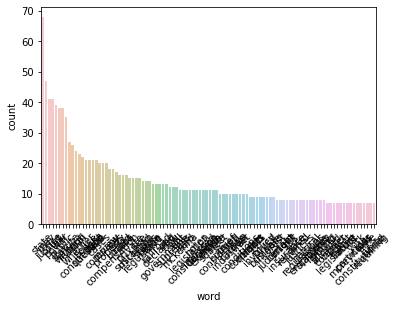

In [59]:
ax = sns.barplot(x = 'word', y = 'count', data=counts_df.iloc[0:100], alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Looks okay, but it's a little messy. Let's see if we can pretty it up a bit. Some space between each of the labels along the x axis would be helpful. There's a [parameter](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html) for `matplotlib.axes.Axes.set_xlabel`—"labelpad"—that we can use to increase the distance between each of the labels. The plot below uses a scalar of 10, but 15 might be even better. We can leave this as a short exercise to fiddle with this number to see what looks best to you.

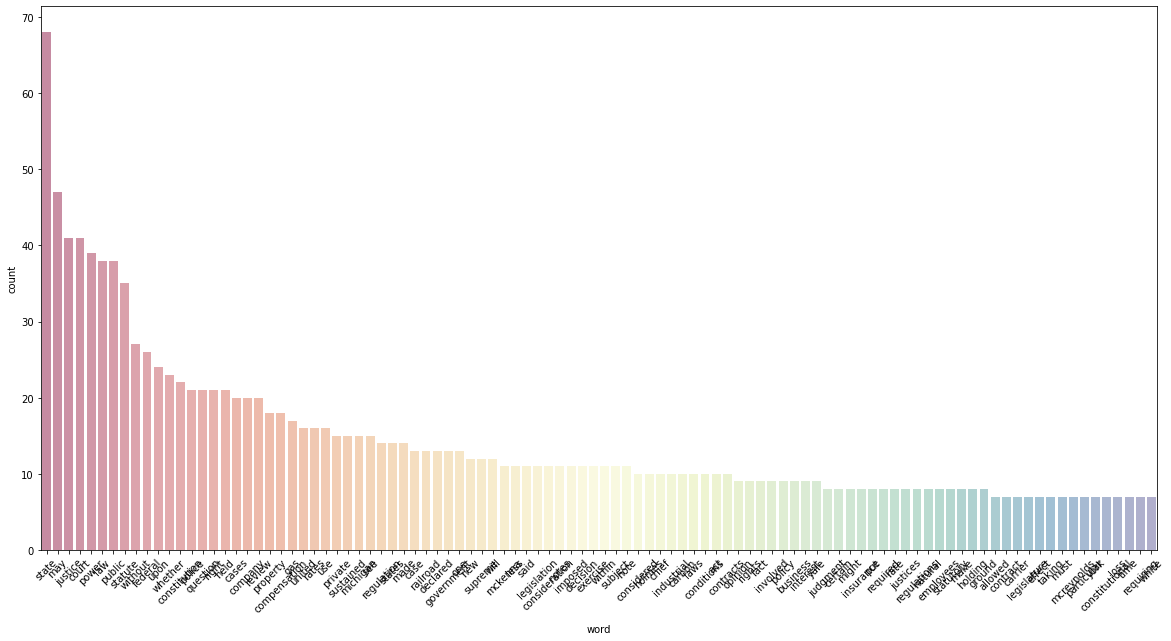

In [60]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x = 'word', y = 'count', data=counts_df.iloc[0:100], alpha=0.5, palette='Spectral')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.xaxis.labelpad = 10

One can also feel free to experiment with the different color palettes on offer from `seaborn`—we would like to note that we're probably going to want to look at the ["Sequential color palettes"](https://seaborn.pydata.org/tutorial/color_palettes.html) as our situation here seems to fall quite nicely under this category where "data range from relatively low or uninteresting values to relatively high or interesting values (or vice versa)." As it stands,, the seaborn plot above is nice—it gives us a visualization of the top 100 most frequent words in the very first article in the dataset while also color-coding (with the color palette from seaborn) the counts such that words with similar counts share a color shade. But what if we wanted something just a little bit more "compact"? 

Given that we are going to want to do some plotting of this returned dataframe, we'll write a simple little function for the colors that we will eventually use in our visualizations. The following function will take a [`color_palette`](http://seaborn.pydata.org/generated/seaborn.color_palette.html) from the seaborn library (for further information on "choosing" and working with "color palettes" in seaborn, head on over [here](https://seaborn.pydata.org/tutorial/color_palettes.html)) and will return a list of hex codes used in that palette—we're going to use this list when we create a grid of barplots.

In [61]:
def get_color_dict(palette, number, start):
    sns_color_palette = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    dictionary_of_colors = dict(enumerate(sns_color_palette, start=start))
    return(dictionary_of_colors)

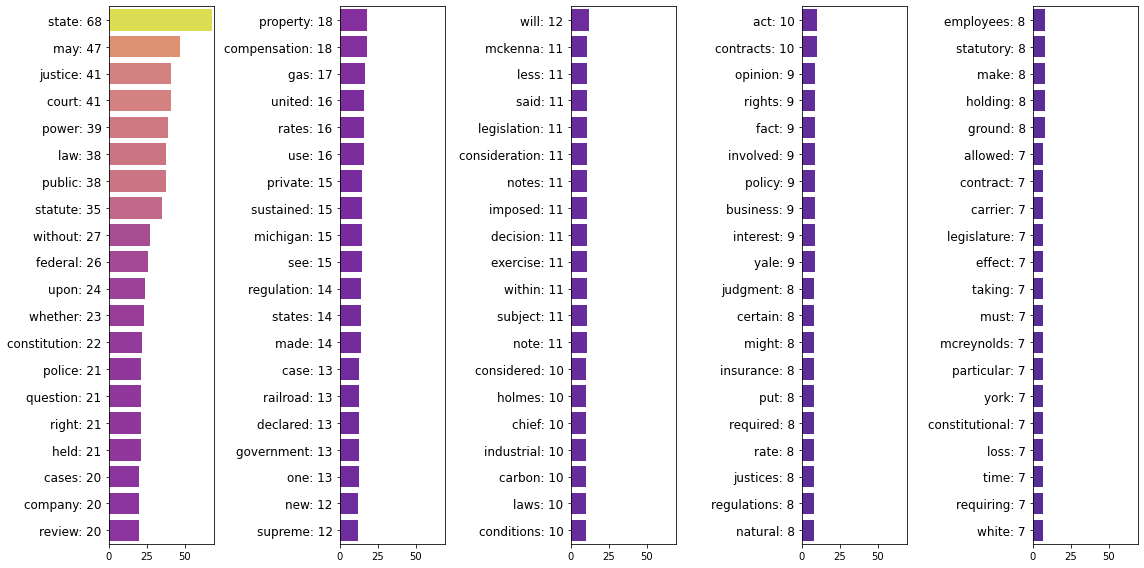

In [62]:
index_list = [[i[0], i[-1]+1] for i in np.array_split(range(100), 5)]
n = counts_df['count'].max()
color_dictionary = get_color_dict('plasma', n, 1)

fig, axs = plt.subplots(1, 5, figsize=(16, 8), facecolor='white', squeeze=False)
for col, idx in zip(range(0, 5), index_list):
    df = counts_df[idx[0]:idx[-1]]
    #print(df)
    label = [word + ': ' + str(count) for word, count in zip(df['word'], df['count'])]
    colors = [color_dictionary.get(i) for i in df['count']]
    x = list(df['count'])
    y = list(range(0, 20))
    #print(len(color_l))
    sns.barplot(x = x, y = y, data=df, alpha=0.9, orient='h', ax = axs[0][col], palette=colors)
    axs[0][col].set_xlim(0, n+1)
    axs[0][col].set_yticklabels(label, fontsize=12)
    #axs[0][col].spines['bottom'].set_color('white')
    #axs[0][col].spines['right'].set_color('white')
    #axs[0][col].spines['left'].set_color('white')
    #axs[0][col].spines['top'].set_color('white')

plt.tight_layout()
plt.show()

Here we can see that we get a visualization that seems a bit more compact (and perhaps somewhat easier to read and interpret) where—like the barplot above—we get words color-coded nicely by their counts. This is nice due to the fact that we hav a couple of different ways to understand the quantities in the `df['count'] column (i.e. we get the actual bars while also utilizing the color too to see the differences in counts).

Another way to potentially visualize our word counts would be to utilize a kind of graph called a ["treemap"](https://plotly.com/python/treemaps/). This visualzation is fantastic for looking at "hierarchical" data. So, for example, say that we had a text that was divided up into different sections. We could, if we wanted, wrangle our data even a little bit further so as to visualize all our word counts based upon their location in a particular section. (We will just show the visualization below and then we'll save the implementation for an exercise.)

In [63]:
import numpy as np
fig = px.treemap(counts_df[0:50], path=[px.Constant("word counts"), 'word'],
    values = 'count',
    color='count',
    color_continuous_scale='plasma',
    color_continuous_midpoint=np.average(counts_df['count']))

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Another visualization type that could be useful for our word frequencies is the "Circle Packing" plot. Once again, we'll show some code and leave playing around with it for another time.

In [64]:
# Very Simple Tutorial on Basic "Circle Packing" available at https://www.python-graph-gallery.com/circular-packing-1-level-hierarchy. 
circles = circlify.circlify(counts_df['count'][0:30].tolist(),
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1))

n = counts_df['count'][0:30].max()
color_dict = get_color_dict('plasma', n, 1)

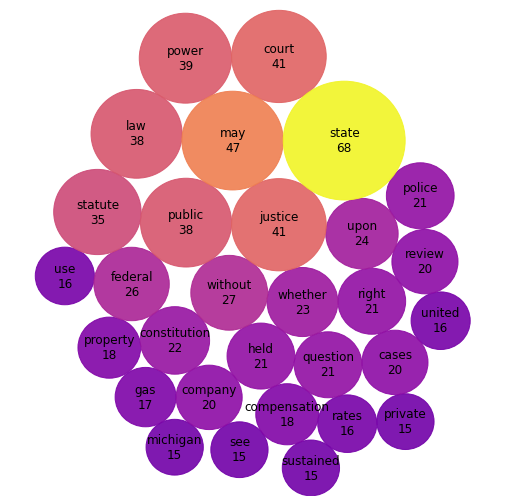

In [65]:
fig, ax = plt.subplots(figsize=(9, 9), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+ circle.r, abs(circle.y)+circle.r) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = list(counts_df['word'][0:30])
counts = list(counts_df['count'][0:30])
labels.reverse()
counts.reverse()

for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color=color_dict.get(count)))
    plt.annotate(label + '\n' + str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

Again, similarly to the barplot above, we have a visualization that uses the size of the circles to represent the `count` of each word while also utilizing the color-coding.

### 6. Exercises:

1. Can we clean-up a string with a bunch of punctuation marks and other special characters in it using some methods in Python that aren't those of the [regular expression library](https://docs.python.org/3/library/re.html) (`re`)? 
2. How do we want to handle the situation where we get all the instances of "the" removed from our dictionary, but still have "The" showing up ...?
3. Write a function that takes in as input some text in a dataframe and eventually returns a dataframe with two columns, one for the "word" and another for the number of times that word occurs ('count'). In the lesson we did this without constructing a function to do it, but it might be good practice to streamline things a bit by creating a custom function.
4. Find some data you are interested that is structured in some way by sections—wrangle the data so that you can chop the text up into the differnt sections, and then produce a sunburst chart that counts word frequencies by each individual section.
5. Can we write some explanatory comments/pseudocode to explain how the lines that produces the horizontal grid of barplots works? 
6. Find some data and produce some circle packing plots of the data!

#### Potential Solutions:

Possible way of implementing the task in Exercise 3:

In [66]:
# We start with our function definition, which takes 'input' as a parameter, which will be the text we want to count words in:

def create_df(input):
    # Next we take that text and split it on whitespace to separate out each word/token/etc.:
    list_words = input.split(' ')
    # Then we create a list that will hold all of the words that have been split:
    set_words_full = list(set(list_words))
    # Next we want to remove all the stopwords from our list with a simple list comprehension (https://www.w3schools.com/python/python_lists_comprehension.asp):
    set_words = [i for i in set_words_full if i not in stop_words]
    # Now that we have all the words separated, we can count them (https://www.w3schools.com/python/ref_list_count.asp):
    count_words = [list_words.count(i) for i in set_words]
    # We thus now have two lists, one that contains the word and the other containing the counts for that word—let's zip those up together (https://www.w3schools.com/python/ref_func_zip.asp) and put them in a dataframe with our two named columns:
    df = pd.DataFrame(zip(set_words, count_words), columns=['word', 'count'])
    # It's not necessary that we sort these values, but since we did something similar with our unigramCount above, we'll do it here just to show some similar functionality with pandas:
    df.sort_values('count', ascending=False, inplace=True)
    # Let's reset the index too:
    df.reset_index(drop=True, inplace=True)
    # Lastly, let's make it so our function returns the created dataframe:
    return df